# Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import os

In [2]:
from olist.data import Olist
data = Olist().get_data()

## 1 - Investigate the cardinalities of various DataFrames

❓ **How many unique `orders`, `reviews`, `sellers`, `products` and `customer` is there ?**  

In [3]:
aggregates = np.array([
    [
        data["orders"].order_id.nunique(),
        data["order_reviews"].review_id.nunique(),
        data["sellers"].seller_id.nunique(),
        data["products"].product_id.nunique(),
        data["customers"].customer_id.nunique(),
    ],
    [
        data["orders"].order_id.count(),
        data["order_reviews"].review_id.count(),
        data["sellers"].seller_id.count(),
        data["products"].product_id.count(),
        data["customers"].customer_id.count(),
    ],
])

pd.DataFrame(data=np.vstack((aggregates, aggregates[0,:]/aggregates[1,:])).T,
             index=['orders', 'reviews', 'sellers', 'products', 'customers'],
            columns=['nunique', 'count','ratio'])

,nunique,count,ratio
orders,99441.0,99441.0,1.000000
reviews,98410.0,99224.0,0.991796
sellers,3095.0,3095.0,1.000000
products,32951.0,32951.0,1.000000
customers,99441.0,99441.0,1.000000


❓ **How many reviews is there per order? Do we have reviews for all orders ?**

In [4]:
orders = data['orders'][['customer_id', 'order_id']]
reviews = data['order_reviews'][['order_id', 'review_id']]

In [5]:
orders_reviews = orders.merge(reviews, on='order_id', how='outer')
orders_reviews.head(5)

,customer_id,order_id,review_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,8d5266042046a06655c8db133d120ba5
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,e73b67b67587f7644d5bd1a52deb1b01
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,359d03e676b3c069f62cadba8dd3f6e8
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,e50934924e227544ba8246aeb3770dd4


In [6]:
# Check missing reviews
orders_reviews.isna().sum()

customer_id      0
order_id         0
review_id      768
dtype: int64

array([[<AxesSubplot:title={'center':'review_id'}>]], dtype=object)

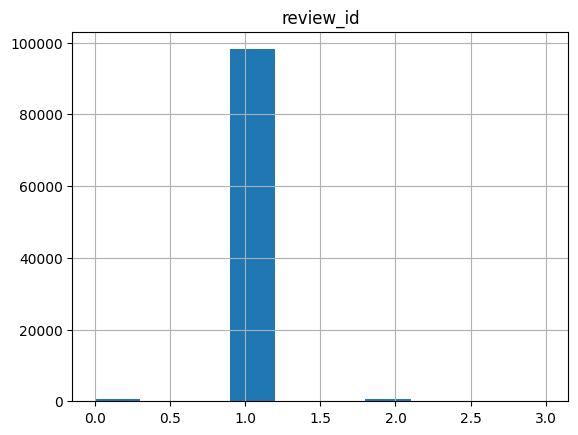

In [8]:
# Check for max number of reviews per order
orders_reviews.groupby(["order_id", "customer_id"]).count().hist()